# Decision Tree : Social Network Ads

For the same car dataset Social Network Ads we build Decision tree model and the dataset is downloaded from kaggle.

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model Creation

4.Model Evaluation

In [263]:
##1.Importing dependencies and Load data
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import tree


In [203]:
# Load the dataset

data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [204]:
#2. EDA
# Rows and columns

data.shape

(400, 5)

In [205]:
# Columns
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [206]:
# Data Types

data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [207]:
# Data Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [208]:
# Statistical Information

data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [209]:
# drop the User ID column

data=data.drop('User ID',axis=1)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [210]:
# Check Balancing of data

data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Balancing required

In [212]:
# Checking null values

data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No null values

<AxesSubplot:xlabel='Age', ylabel='Count'>

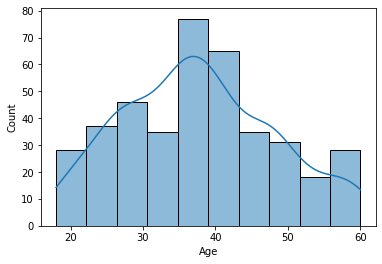

In [213]:
# Distribution of Age data

sns.histplot(data=data.Age,kde=True)

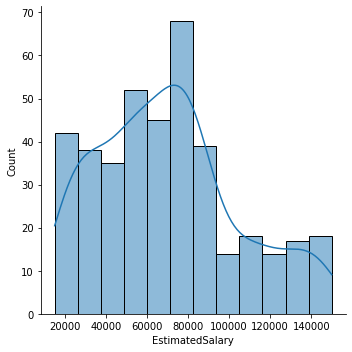

In [214]:
# Distribution of Estimated Salary feature

sns.displot(data=data.EstimatedSalary,kde=True)

<AxesSubplot:>

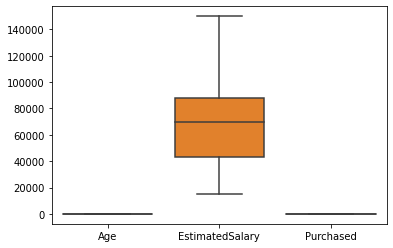

In [215]:
# Outlier Checking

sns.boxplot(data=data)

No outliers detected

In [220]:
# Encoding 

le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<AxesSubplot:>

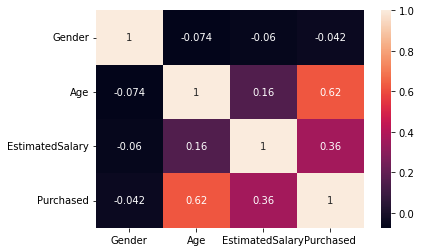

In [221]:
# Correlation checking

sns.heatmap(data.corr(),annot=True)

In [228]:
# Determining : X and y

X=data.drop('Purchased',axis=1).values
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [229]:
y=data['Purchased'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [264]:
# Balancing the data

obj=RandomOverSampler(sampling_strategy=0.8)
X1,y1=obj.fit_resample(X,y)
X1.shape,y.shape

((462, 3), (400,))

In [235]:
#3. Model creation
# Split the data

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)
print("X_train:",np.shape(X_train))
print("X_test:",np.shape(X_test))
print("y_train:",np.shape(y_train))
print("y_test:",np.shape(y_test))

X_train: (323, 3)
X_test: (139, 3)
y_train: (323,)
y_test: (139,)


In [236]:
# model selection and fit

dt=DecisionTreeClassifier(criterion='entropy',random_state=2)
model=dt.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [239]:
X_test

array([[     0,     36,  75000],
       [     1,     18,  82000],
       [     0,     30, 116000],
       [     0,     49, 141000],
       [     0,     58,  95000],
       [     1,     55,  39000],
       [     0,     38,  50000],
       [     1,     20,  74000],
       [     1,     38,  61000],
       [     1,     41,  79000],
       [     0,     47,  47000],
       [     0,     34,  25000],
       [     1,     35,  79000],
       [     1,     40,  75000],
       [     0,     43, 112000],
       [     0,     50,  20000],
       [     1,     55,  39000],
       [     1,     45,  79000],
       [     0,     38, 112000],
       [     0,     39,  79000],
       [     0,     57, 122000],
       [     1,     39, 134000],
       [     0,     37,  80000],
       [     0,     48,  30000],
       [     0,     42,  80000],
       [     1,     46, 117000],
       [     0,     48,  29000],
       [     0,     27,  96000],
       [     1,     30, 107000],
       [     1,     59, 143000],
       [  

In [240]:
model.predict([[0,55,130000]])

array([1], dtype=int64)

In [241]:
# Model predication for train data

y_pred_train=model.predict(X_train)

In [242]:
# accuracy for test data

accuracy_score(y_test,y_pred_test)

0.8561151079136691

In [243]:
# accuracy for train data

accuracy_score(y_train,y_pred_train)

1.0

If have difference between the two accuricies then overfitting is occures. Hence our model in overfitting

In [265]:
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred_test)
cm

array([[63, 12],
       [ 8, 56]], dtype=int64)

In [267]:
# TP,TN,FP,FN values

TP=cm[0][0]
FP=cm[1][0]
TN=cm[1][1]
FN=cm[0][1]
print("TP:",TP)
print("FP:",FP)
print("TN:",TN)
print("FN:",FN)

TP: 63
FP: 8
TN: 56
FN: 12


In [268]:
# Accuracy,Precision,Recall

P=TP/(TP+FP)
R=TP/(TP+FN)
print("Accuracy:",(TP+TN)/(TP+TN+FN+FP))
print("Precision:",P)
print("Recall:",R)

Accuracy: 0.8561151079136691
Precision: 0.8873239436619719
Recall: 0.84


In [269]:
# Classification report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        75
           1       0.82      0.88      0.85        64

    accuracy                           0.86       139
   macro avg       0.86      0.86      0.86       139
weighted avg       0.86      0.86      0.86       139



[Text(0.35344827586206895, 0.9545454545454546, 'X[1] <= 42.5\nentropy = 0.988\nsamples = 323\nvalue = [182, 141]'),
 Text(0.1724137931034483, 0.8636363636363636, 'X[2] <= 90500.0\nentropy = 0.731\nsamples = 215\nvalue = [171, 44]'),
 Text(0.06896551724137931, 0.7727272727272727, 'X[1] <= 36.5\nentropy = 0.215\nsamples = 176\nvalue = [170, 6]'),
 Text(0.034482758620689655, 0.6818181818181818, 'entropy = 0.0\nsamples = 118\nvalue = [118, 0]'),
 Text(0.10344827586206896, 0.6818181818181818, 'X[2] <= 67500.0\nentropy = 0.48\nsamples = 58\nvalue = [52, 6]'),
 Text(0.06896551724137931, 0.5909090909090909, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.13793103448275862, 0.5909090909090909, 'X[2] <= 83500.0\nentropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(0.10344827586206896, 0.5, 'X[0] <= 0.5\nentropy = 0.634\nsamples = 25\nvalue = [21, 4]'),
 Text(0.06896551724137931, 0.4090909090909091, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.13793103448275862, 0.40909090

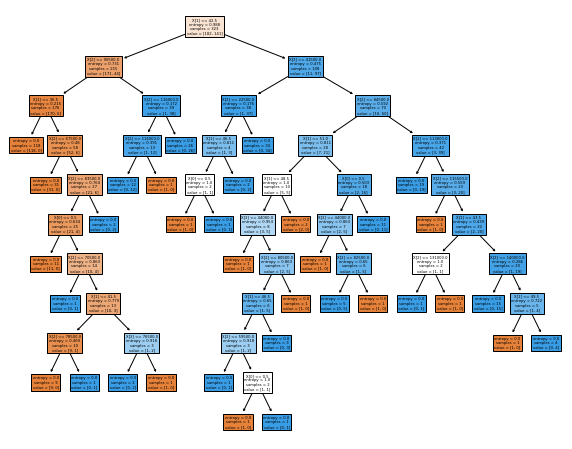

In [270]:
# Decision tree for the above model

plt.figure(figsize=(10,8))
tree.plot_tree(dt,filled=True)

In [ ]:
# Overfitting solution: tree prunning

In [271]:
# Finding path

path=dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=path.ccp_alphas
impurities=path.impurities

In [272]:
# create model

dt1=DecisionTreeClassifier(ccp_alpha=0.016,criterion='entropy')
model1=dt1.fit(X_train,y_train)
# test data
y_test_pred=model1.predict(X_test)

In [273]:
# train data

y_train_pred=model1.predict(X_train)

In [274]:
# test data
accuracy_score(y_test,y_test_pred)

0.8561151079136691

In [276]:
#train data

accuracy_score(y_train,y_train_pred)

0.9442724458204335

In [277]:
# Confusion matrix

cm1=confusion_matrix(y_test,y_test_pred)
cm1

array([[62, 13],
       [ 7, 57]], dtype=int64)

In [278]:
TP1=cm1[0][0]
FP1=cm1[1][0]
TN1=cm1[1][1]
FN1=cm1[0][1]
print("TP:",TP1)
print("FP:",FP1)
print("TN:",TN1)
print("FN:",FN1)

TP: 62
FP: 7
TN: 57
FN: 13


In [279]:
P1=TP1/(TP1+FP1)
R1=TP1/(TP1+FN1)
print("Accuracy:",(TP1+TN1)/(TP1+TN1+FN1+FP1))
print("Precision:",P1)
print("Recall:",R1)

Accuracy: 0.8561151079136691
Precision: 0.8985507246376812
Recall: 0.8266666666666667


In [280]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        75
           1       0.81      0.89      0.85        64

    accuracy                           0.86       139
   macro avg       0.86      0.86      0.86       139
weighted avg       0.86      0.86      0.86       139



[Text(0.6666666666666666, 0.9, 'X[1] <= 42.5\nentropy = 0.988\nsamples = 323\nvalue = [182, 141]'),
 Text(0.5, 0.7, 'X[2] <= 90500.0\nentropy = 0.731\nsamples = 215\nvalue = [171, 44]'),
 Text(0.3333333333333333, 0.5, 'X[1] <= 36.5\nentropy = 0.215\nsamples = 176\nvalue = [170, 6]'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.0\nsamples = 118\nvalue = [118, 0]'),
 Text(0.5, 0.3, 'X[2] <= 67500.0\nentropy = 0.48\nsamples = 58\nvalue = [52, 6]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.172\nsamples = 39\nvalue = [1, 38]'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.475\nsamples = 108\nvalue = [11, 97]')]

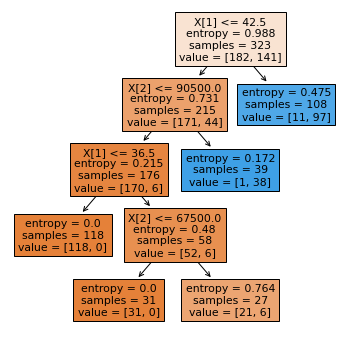

In [282]:
# After prunning 

plt.figure(figsize=(6,6))
tree.plot_tree(dt1,filled=True)